Segunda Avaliação de Probabilidade e Estatística
================================================



**Nome**: Yasmin Barbosa Shimizu

**Matrícula**: 24023

**Duração:**  14/11 14h ~ 16h | 15/11 14h30 ~ 17h45 *(considerando momentos de distração e coquetismo)*

<div class="alert alert-warning">
Leia com atenção antes de iniciar a sua resolução.
</div>

Olá, seja bem-vinda à segunda avaliação da disciplina de probabilidade e estatística. Esta avaliação contém 4 questões, sendo que a nota máxima pode ser atingida respondendo corretamente as 3 primeiras questões. A 4ª questão é bônus e vale menos pontos. A avaliação é individual e com consulta, porém o uso de modelos de linguagem não é permitido.

Certifique-se que cada questão contém *todas* as variáveis/funções/importações para a resposta. Não crie células de código fora das questões. Não use variáveis/funções/importações de outras questões. Sempre defina tudo que for necessário dentro da própria questão.

Lembre-se de guiar o leitor na sua resposta. Alguns leitores ainda não desenvolveram a habilidade de entender sua intenção sem que ela se apresente como um texto bem organizado e bem redigido. A pessoa que irá dar a nota, por exemplo, ainda não foi capaz de desenvolver esta habilidade.

O arquivo do censo dos estudantes da turma 2024 está no teams da disciplina. Não é necessário enviar este arquivo na sua entrega, envie apenas este notebook. Os dados dos pinguins podem ser obtidos utilizando o módulo `seaborn`, assim como feito na disciplina de Aprendizado de Máquina.



## Questão 1



Considere o número de livros lidos pelos estudantes da Ilum da turma 2024 no ano passado como sendo a variável aleatória $X$. Considere as seguintes hipóteses.

-   $H_0$: o número médio de livros lidos pelos estudantes da Ilum da turma 2024 no ano passado foi de 10 livros.

-   $H_1$: o número médio de livros lidos pelos estudantes da Ilum da turma 2024 no ano passado *não* foi de 10 livros.

Execute um teste de hipóteses para testar estas hipóteses. Caso rejeite $H_0$, realize um teste após o teste para chegar na resposta final. Deixe claro para o leitor (em texto e em código) *todos* os passos tomados e, para encerrar, escreva uma breve conclusão. Fique à vontade para utilizar testes de hipóteses prontos ou para realizar um teste de hipótese com simulação. Em caso de dúvida, use do bom senso e dos conhecimentos adquiridos nas discussões em sala. Se tiver que supor algo, deixe isso claro para o leitor.

<hr>



### Resposta:

Primeiramente, para resolução deste problema, importaremos as bibliotecas a serem utilizadas na questão:

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

Feito isso, partiremos para o teste de hipótese, definindo o nível de confiança e a significância a serem utilizados no teste. Utilizaremos o valor tradicional de 95% de confiança.

In [2]:
NIVEL_CONFIANCA = 0.95

significancia = 1 - NIVEL_CONFIANCA

Importemos, então, os dados a serem utilizados na questão. Estes serão tratados como um *dataframe* através do módulo `pandas`.

In [3]:
arquivo = "Censo turma 2024.xlsx"

df = pd.read_excel(arquivo)

df

,Qual é a sua altura em centímetros?,Qual é o número de sapato que você calça?,Qual o mês do seu aniversário?,Quantos irmãos você tem?,Quantos livros você leu no ano passado?\n,"Das cores abaixo, qual é a sua favorita (ou a cor que mais gosta se sua cor favorita não estiver na lista)?",Qual a sua opinião sobre azeitona?,Qual destas linhas de estudo é a que você tem mais afinidade?,Qual destas linhas de estudo é a que você tem menos afinidade?,Cachorros ou gatos?,Escolha um número aleatório entre 0 e 100\n,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,181,42,7,1,3.0,Verde,5.0,Ciências da vida,Ciências da matéria,Gatos!,77,NaN,NaN,NaN,NaN
1,163,34,6,1,4.0,Azul,1.0,Ciências da vida,Ciências humanas,Cachorros!,7,NaN,NaN,NaN,NaN
2,178,40,11,1,16.0,Vermelho,4.0,Ciências da matéria,Ciências humanas,Cachorros!,69,NaN,NaN,NaN,NaN
3,153,36,3,2,12.0,Preto,1.0,Ciências da matéria,Ciências humanas,Gatos!,13,NaN,NaN,NaN,NaN
4,195,43,2,0,20.0,Azul,3.0,Ciências da vida,Ciências humanas,Cachorros!,38,NaN,NaN,NaN,NaN
5,184,43,5,1,6.0,Roxo,4.0,Ciências da matéria,Ciências humanas,Gatos!,93,NaN,NaN,NaN,NaN
6,164,39,11,2,3.0,Azul,5.0,Ciências da matéria,Ciências humanas,Cachorros!,89,NaN,NaN,NaN,NaN
7,158,35,9,2,4.0,Azul,5.0,Ciências da matéria,Ciências da vida,Gatos!,77,NaN,NaN,NaN,NaN
8,169,41,5,1,6.0,Azul,2.0,Ciências da matéria,Ciências da vida,Gatos!,7,NaN,NaN,NaN,NaN
9,173,43,4,2,1.0,Azul,4.0,Ciências da vida,Ciências da vida,Gatos!,71,NaN,NaN,NaN,NaN


Como analisaremos apenas o número de livros lidos pelos estudantes da turma, salvaremos estes dados na forma de lista. Removeremos aqueles cuja resposta está vazia (`nan`). Assim, definimos nossa variável aleatória $L$ e seu número de observações:

In [4]:
L =  list(df["Quantos livros você leu no ano passado?\n"].dropna())

n = len(L)

print(f"L = {L}")
print(" ")
print(f"Temos {n} observações.")

L = [3.0, 4.0, 16.0, 12.0, 20.0, 6.0, 3.0, 4.0, 6.0, 1.0, 12.0, 4.0, 7.0, 20.0, 4.0, 110.0, 0.0, 19.0, 2.0, 10.0, 0.0, 15.0, 60.0, 6.0, 2.0, 10.0, 20.0, 2.0, 7.0, 3.0, 10.0, 6.0, 8.0, 15.0]
 
Temos 34 observações.


Sendo assim, partimos efetivamente para o teste. Aqui, foi escolhido utilizar um teste de hipótese pronto do módulo `scipy`, mais especificamente, o *teste t para uma amostra*, que compara a média de uma variável aleatória à um valor de média pré-definido. Este teste é indicado para variáveis com distribuição normal, ou para variáveis com mais de 30 observações sem grande assimetria. Como nossos dados se enquadram no último caso, podemos utilizá-lo. Vejamos uma observação gráfica dos dados:

Text(0, 0.5, 'Ocorrências')

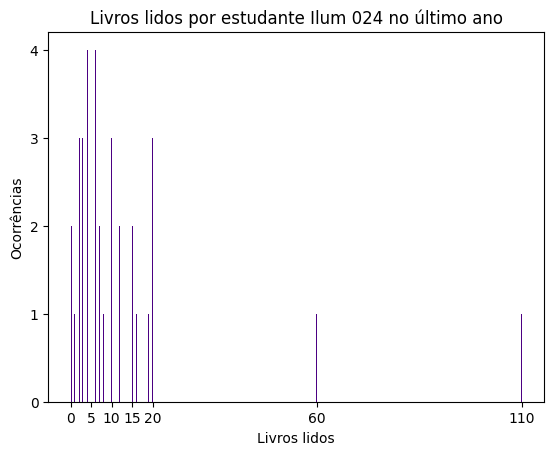

In [5]:
plt.hist(L, bins=500, color="indigo")
plt.xticks([0,5,10,15,20,60,110])
plt.yticks([0,1,2,3,4])
plt.title("Livros lidos por estudante Ilum 024 no último ano")
plt.xlabel("Livros lidos")
plt.ylabel("Ocorrências")

Apesar de apresentar dois outliers discrepantes do intervalo das demais observações, percebe-se que a variável apresenta uma distribuição razoavelmente próxima a uma distribuição normal. Assim, os dados são robustos o suficiente para aplicar o teste t devido ao seu número de observações.

Com base, então, na nossa hipótese nula, compararemos a média da variável aleatória $L$ ao valor que hipotetizamos ($\mu_0 = 10$) através do `ttest_1samp` do `scipy`, registrando o pvalor obtido.

In [6]:
MEDIA_HIPOTETICA = 10

resultado_teste = stats.ttest_1samp(L, MEDIA_HIPOTETICA)

pvalor = resultado_teste.pvalue

print(f"O pvalor foi de {pvalor}.")

O pvalor foi de 0.46759008076274466.


Tendo o pvalor, iremos compará-lo com o valor de significância definido previamente. Se o pvalor for menor que a siginificância, rejeitamos $H_0$, caso contrário, falhamos em rejeitar $H_0$.

In [7]:
if pvalor < significancia:
    print(f"Devemos rejeitar H0.")
else:
    print(f"Não devemos rejeitar H0.")

Não devemos rejeitar H0.


#### Conclusão
Realizando o teste t para uma amostra, obtivemos pvalor = 0.47, de modo que falhamos em rejeitar $H_0$. Sendo assim, comcluímos que o número médio de livros lidos pelos estudantes da Ilum da turma 2024 no ano passado foi de 10 livros.

## Questão 2



Em uma certa quinta-feira chuvosa, um estudante leu uma notícia no site *Notícias Reais Verdadeiras Mesmo Pode Confiar* que pessoas que gostam mais de gatos do que de cachorros costumam não gostar de azeitonas. Como o site parecia bastante confiável, este estudante ficou convencido de que esta era de fato a verdade do universo. Sua colega, muito astuta, exercitou do seu bom senso e desconfiou da notícia do site. Ela levantou as seguintes hipóteses e pretende testá-las utilizando os dados do censo da turma 2024 da Ilum:

-   $H_0$: as variáveis aleatórias "Cachorros ou gatos?" e "Qual a sua opinião sobre azeitona?" são independentes.

-   $H_1$: as variáveis aleatórias "Cachorros ou gatos?" e "Qual a sua opinião sobre azeitona?" *não* são independentes.

Realize um teste de hipóteses para resolver este problema.

Para este problema, converta a variável "Qual a sua opinião sobre azeitona?" em uma variável binária com os rótulos "Gosta" (pessoas que deram nota 4 ou 5 para azeitona) e "Não gosta" (pessoas que deram nota 1, 2 ou 3 para azeitona).

Não se esqueça de deixar claro na forma de texto e código todos os passos realizados. Escreva uma breve conclusão a partir do resultado obtido. Em caso de dúvida, faça que nem a estudante astuta e exercite do seu bom senso. Deixe todas suas escolhas e suposições claras para o leitor.

<hr>



### Resposta:

Primeiramente, para resolução deste problema, importaremos as bibliotecas a serem utilizadas na questão:

In [8]:
import pandas as pd
from scipy import stats

Feito isso, partiremos para o teste de hipótese, definindo o nível de confiança e a significância a serem utilizados no teste. Utilizaremos o valor tradicional de 95% de confiança.

In [9]:
NIVEL_CONFIANCA = 0.95

significancia = 1 - NIVEL_CONFIANCA

Importemos, então, os dados a serem utilizados na questão. Estes serão tratados como um *dataframe* através do módulo `pandas`.

In [10]:
arquivo = "Censo turma 2024.xlsx"

df = pd.read_excel(arquivo)

df

,Qual é a sua altura em centímetros?,Qual é o número de sapato que você calça?,Qual o mês do seu aniversário?,Quantos irmãos você tem?,Quantos livros você leu no ano passado?\n,"Das cores abaixo, qual é a sua favorita (ou a cor que mais gosta se sua cor favorita não estiver na lista)?",Qual a sua opinião sobre azeitona?,Qual destas linhas de estudo é a que você tem mais afinidade?,Qual destas linhas de estudo é a que você tem menos afinidade?,Cachorros ou gatos?,Escolha um número aleatório entre 0 e 100\n,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,181,42,7,1,3.0,Verde,5.0,Ciências da vida,Ciências da matéria,Gatos!,77,NaN,NaN,NaN,NaN
1,163,34,6,1,4.0,Azul,1.0,Ciências da vida,Ciências humanas,Cachorros!,7,NaN,NaN,NaN,NaN
2,178,40,11,1,16.0,Vermelho,4.0,Ciências da matéria,Ciências humanas,Cachorros!,69,NaN,NaN,NaN,NaN
3,153,36,3,2,12.0,Preto,1.0,Ciências da matéria,Ciências humanas,Gatos!,13,NaN,NaN,NaN,NaN
4,195,43,2,0,20.0,Azul,3.0,Ciências da vida,Ciências humanas,Cachorros!,38,NaN,NaN,NaN,NaN
5,184,43,5,1,6.0,Roxo,4.0,Ciências da matéria,Ciências humanas,Gatos!,93,NaN,NaN,NaN,NaN
6,164,39,11,2,3.0,Azul,5.0,Ciências da matéria,Ciências humanas,Cachorros!,89,NaN,NaN,NaN,NaN
7,158,35,9,2,4.0,Azul,5.0,Ciências da matéria,Ciências da vida,Gatos!,77,NaN,NaN,NaN,NaN
8,169,41,5,1,6.0,Azul,2.0,Ciências da matéria,Ciências da vida,Gatos!,7,NaN,NaN,NaN,NaN
9,173,43,4,2,1.0,Azul,4.0,Ciências da vida,Ciências da vida,Gatos!,71,NaN,NaN,NaN,NaN


Como analisaremos apenas a preferência por gatos e cachorros, criaremos um dicionário contendo apenas estes dados. Removeremos aqueles cuja resposta não foi contabilizada (`nan`) em pelo menos uma das variáveis aleatórias e converteremos o gosto por azeitonas em binário, sendo 1  "Gosta" (notas 4 e 5), e 0 "Não gosta" (notas 1, 2, 3). Salvaremos os dados em duas listas. Assim, definimos nossas variáveis aleatórias $P$ e $A$ e seu número de observações:

In [11]:
df = df[["Cachorros ou gatos?", "Qual a sua opinião sobre azeitona?"]].dropna()

df

,Cachorros ou gatos?,Qual a sua opinião sobre azeitona?
0,Gatos!,5.0
1,Cachorros!,1.0
2,Cachorros!,4.0
3,Gatos!,1.0
4,Cachorros!,3.0
5,Gatos!,4.0
6,Cachorros!,5.0
7,Gatos!,5.0
8,Gatos!,2.0
9,Gatos!,4.0


In [12]:
P  = df["Cachorros ou gatos?"].tolist()

A_quant = df["Qual a sua opinião sobre azeitona?"].tolist()

A = []

for i in A_quant:
    if i >=4:
        A.append(1)
    else:
        A.append(0)
        
n = len(P)

print(f"P = {P}")
print(f"A = {A}")
print("")
print(f"As variáveis aleatórias tem {n} observações cada.")

P = ['Gatos!', 'Cachorros!', 'Cachorros!', 'Gatos!', 'Cachorros!', 'Gatos!', 'Cachorros!', 'Gatos!', 'Gatos!', 'Gatos!', 'Gatos!', 'Cachorros!', 'Cachorros!', 'Cachorros!', 'Gatos!', 'Cachorros!', 'Gatos!', 'Gatos!', 'Gatos!', 'Gatos!', 'Cachorros!', 'Cachorros!', 'Gatos!', 'Cachorros!', 'Cachorros!', 'Gatos!', 'Gatos!', 'Cachorros!', 'Cachorros!', 'Gatos!', 'Cachorros!', 'Cachorros!', 'Gatos!', 'Cachorros!']
A = [1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]

As variáveis aleatórias tem 34 observações cada.


Podemos vizualizar a variável aleatória binária construída através de um *dataframe* ou construindo uma tabela de contingência:

In [13]:
df["Gosta ou não gosta de azeitona?"] = A

df

,Cachorros ou gatos?,Qual a sua opinião sobre azeitona?,Gosta ou não gosta de azeitona?
0,Gatos!,5.0,1
1,Cachorros!,1.0,0
2,Cachorros!,4.0,1
3,Gatos!,1.0,0
4,Cachorros!,3.0,0
5,Gatos!,4.0,1
6,Cachorros!,5.0,1
7,Gatos!,5.0,1
8,Gatos!,2.0,0
9,Gatos!,4.0,1


In [14]:
gatos1 = 0
gatos0 = 0
caes1 = 0
caes0 = 0

for p, a in zip(P,A):
    if p == "Gatos!":
        if a == 1:
            gatos1+=1
        else:
            gatos0+=1
    else:
        if a == 1:
            caes1+=1
        else:
            caes0+=1


dados = {
    "Evento": ["Gosta de azeitona (1)", "Não gosta de azeitona (0)"],
    "Gatos!": [gatos1, gatos0],
    "Cachorros!": [caes1, caes0],
}

tab_contingencia = pd.DataFrame(dados)
tab_contingencia = tab_contingencia.set_index("Evento", drop=True)

tab_contingencia

,Gatos!,Cachorros!
Evento,,
Gosta de azeitona (1),8,10
Não gosta de azeitona (0),9,7


Sendo assim, partimos efetivamente para o teste. Aqui, foi escolhido utilizar um teste de hipótese pronto do módulo `scipy`, mais especificamente, o *teste de independência qui-quadrado*, que verifica se duas variáveis aleatórias são independentes. Para esse teste, tem-se como exigência a construção de uma tabela de contingência com frequência maior que 5 para todas as ocorrências. Como tal tabela foi construída previamente e cumpre a condição exigida, podemos aplicar tal método, calcular o pvalor obtido, comparando-o com a siginificância determinada anteriormente.

In [15]:
resultado_teste = stats.chi2_contingency(tab_contingencia)

pvalor = resultado_teste.pvalue

print("pvalor = ", pvalor)

if pvalor < significancia:
    print(f"Devemos rejeitar H0.")
else:
    print(f"Não devemos rejeitar H0.")

pvalor =  0.7311530400117543
Não devemos rejeitar H0.


#### Conclusão:
Realizando o teste de independência qui-quadrado, obtivemos pvalor = 0.73, de modo que falhamos em rejeitar $H_0$. Sendo assim, concluímos que a preferência por pets o gosto por azeitonas se mostram variáveis independentes para a amostragem feita no Censo Ilum 2024.

## Questão 3



Considere o conjunto de dados de pinguins. Considere as seguintes variáveis aleatórias:

-   $X_a$: massa dos pinguins gentoo do sexo feminino
-   $X_b$: massa dos pinguins gentoo do sexo masculino
-   $X_c$: massa dos pinguins adelie do sexo feminino
-   $X_d$: massa dos pinguins adelie do sexo masculino

Sendo $\mu_a$ a média de $X_a$, $\mu_b$ a média de $X_b$ e assim por diante, considere as seguintes hipóteses:

-   $H_0$: $\mu_a = \mu_b = \mu_c = \mu_d$

-   $H_1$: pelo menos uma das médias $\mu_i$ é diferente das demais

Realize um teste de hipóteses para testar as hipóteses levantadas. Caso rejeite $H_0$, realize um teste post-hoc adequado e escreva para o leitor sobre o resultado do teste post-hoc, analisando os p-valores encontrados. Novamente, deixe *todos* os passos tomados claros para o leitor. Escreva uma breve conclusão para encerrar sua análise.

<hr>



### Resposta:

Primeiramente, para resolução deste problema, importaremos as bibliotecas a serem utilizadas na questão:

In [16]:
import seaborn as sns
import scikit_posthocs as sp
from scipy import stats
import pandas as pd
from itertools import combinations

Feito isso, partiremos para o teste de hipótese, definindo o nível de confiança e a significância a serem utilizados no teste. Utilizaremos o valor tradicional de 95% de confiança.

In [17]:
NIVEL_CONFIANCA = 0.95

significancia = 1 - NIVEL_CONFIANCA

Importemos, então, os dados a serem utilizados na questão do módulo `seaborn`. Estes serão tratados como um *dataframe*.


In [18]:
df = sns.load_dataset("penguins")
df = df.dropna()

df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Como analisaremos apenas a massa dos pinguins relacionado à espécie e ao sexo, criaremos um dicionário contedo apenas estes dados. Removeremos aqueles com dados faltantes (`nan`) em pelo menos uma dessas variáveis aleatórias e classificaremos os dados de acordo com espécie e sexo. Salvaremos os dados em listas de acordo com a classificação feita. Assim, definimos nossas variáveis aleatórias $X_a$, $X_b$, $X_c$ e $X_d$ e seu número de observações:

In [19]:
df = df[["species", "body_mass_g", "sex" ]].dropna()

df

,species,body_mass_g,sex
0,Adelie,3750.0,Male
1,Adelie,3800.0,Female
2,Adelie,3250.0,Female
4,Adelie,3450.0,Female
5,Adelie,3650.0,Male
...,...,...,...
338,Gentoo,4925.0,Female
340,Gentoo,4850.0,Female
341,Gentoo,5750.0,Male
342,Gentoo,5200.0,Female


In [20]:
specie = df["species"].tolist()
mass = df["body_mass_g"].tolist()
sex = df["sex"].tolist()

Xa = []
Xb = []
Xc = []
Xd = []

for e, m, s in zip (specie,mass,sex):
    if e == "Gentoo":
        if s == "Female":
            Xa.append(m)
        elif s == "Male":
            Xb.append(m)
    elif e == "Adelie":
        if s == "Female":
            Xc.append(m)
        elif s == "Male":
            Xd.append(m)
            
print(f"Xa = {Xa}")
print(f"Xb = {Xb}")
print(f"Xc = {Xc}")
print(f"Xd = {Xd}")

print(f"Temos {len(Xa)} observações em Xa.")
print(f"Temos {len(Xb)} observações em Xb.")
print(f"Temos {len(Xc)} observações em Xc.")
print(f"Temos {len(Xd)} observações em Xd.")

Xa = [4500.0, 4450.0, 4550.0, 4800.0, 4400.0, 4650.0, 4650.0, 4200.0, 4150.0, 4800.0, 5000.0, 4400.0, 5000.0, 4600.0, 4700.0, 5050.0, 5150.0, 4950.0, 4350.0, 3950.0, 4300.0, 4900.0, 4200.0, 5100.0, 4850.0, 4400.0, 4900.0, 4300.0, 4450.0, 4200.0, 4400.0, 4700.0, 4700.0, 4750.0, 5200.0, 4700.0, 4600.0, 4750.0, 4625.0, 4725.0, 4750.0, 4600.0, 4875.0, 4950.0, 4750.0, 4850.0, 4875.0, 4625.0, 4850.0, 4975.0, 4700.0, 4575.0, 5000.0, 4650.0, 4375.0, 4925.0, 4850.0, 5200.0]
Xb = [5700.0, 5700.0, 5400.0, 5200.0, 5150.0, 5550.0, 5850.0, 5850.0, 6300.0, 5350.0, 5700.0, 5050.0, 5100.0, 5650.0, 5550.0, 5250.0, 6050.0, 5400.0, 5250.0, 5350.0, 5700.0, 4750.0, 5550.0, 5400.0, 5300.0, 5300.0, 5000.0, 5050.0, 5000.0, 5550.0, 5300.0, 5650.0, 5700.0, 5800.0, 5550.0, 5000.0, 5100.0, 5800.0, 6000.0, 5950.0, 5450.0, 5350.0, 5600.0, 5300.0, 5550.0, 5400.0, 5650.0, 5200.0, 4925.0, 5250.0, 5600.0, 5500.0, 5500.0, 5500.0, 5500.0, 5950.0, 5500.0, 5850.0, 6000.0, 5750.0, 5400.0]
Xc = [3800.0, 3250.0, 3450.0, 3625.0

Sendo assim, partimos efetivamente para o teste. Aqui, foi escolhido utilizar um teste de hipótese pronto do módulo `scipy`, mais especificamente, a *análise de variância para um fator (ANOVA)*, que compara a média entre três ou mais variáveis aleatórias. Este teste é indicado para variáveis com distribuição normal e mesma variância. Sendo assim, aplicaremos o teste de Shapiro-Wilk , para ver se a distribuição dos dados é normal, e de Bartlett para verificar a homoscedasticidade das variáveis aleatórias. Para isso, também utilizaremos as funções do `scipy`: `shapiro` e `bartlett`.

In [21]:
resultado_teste = stats.shapiro(Xa)

pvalor = resultado_teste.pvalue

print("pvalor = ", pvalor)

if pvalor < significancia:
    print(f"Devemos rejeitar H0. Logo, Xa não segue distribuição normal.")
else:
    print(f"Não devemos rejeitar H0. Logo, Xa segue distribuição normal.")

pvalor =  0.5106648802757263
Não devemos rejeitar H0. Logo, Xa segue distribuição normal.


In [22]:
resultado_teste = stats.shapiro(Xb)

pvalor = resultado_teste.pvalue

print("pvalor = ", pvalor)

if pvalor < significancia:
    print(f"Devemos rejeitar H0. Logo, Xb não segue distribuição normal.")
else:
    print(f"Não devemos rejeitar H0. Logo, Xb segue distribuição normal.")

pvalor =  0.9850469827651978
Não devemos rejeitar H0. Logo, Xb segue distribuição normal.


In [23]:
resultado_teste = stats.shapiro(Xc)

pvalor = resultado_teste.pvalue

print("pvalor = ", pvalor)

if pvalor < significancia:
    print(f"Devemos rejeitar H0. Logo, Xc não segue distribuição normal.")
else:
    print(f"Não devemos rejeitar H0. Logo, Xc segue distribuição normal.")

pvalor =  0.19853471219539642
Não devemos rejeitar H0. Logo, Xc segue distribuição normal.


In [24]:
resultado_teste = stats.shapiro(Xd)

pvalor = resultado_teste.pvalue

print("pvalor = ", pvalor)

if pvalor < significancia:
    print(f"Devemos rejeitar H0. Logo, Xd não segue distribuição normal.")
else:
    print(f"Não devemos rejeitar H0. Logo, Xd segue distribuição normal.")

pvalor =  0.41598090529441833
Não devemos rejeitar H0. Logo, Xd segue distribuição normal.


In [25]:
samples = [Xa, Xb, Xc, Xd]

resultado_teste = stats.bartlett(*samples)

pvalor = resultado_teste.pvalue

print("pvalor = ", pvalor)

if pvalor < significancia:
    print(f"Devemos rejeitar H0. Logo, as variâncias não são iguais.")
else:
    print(f"Não devemos rejeitar H0. Logo, as variâncias são iguais.")

pvalor =  0.1458252973058774
Não devemos rejeitar H0. Logo, as variâncias são iguais.


Como as variáveis aleatórias seguem as indicações, utilizaremos o teste ANOVA, importando a função `f_oneway` do `scipy`.

In [26]:
resultado_teste = stats.f_oneway(Xa, Xb, Xc, Xd)

pvalor = resultado_teste.pvalue

print("pvalor = ", pvalor)

if pvalor < significancia:
    print(f"Devemos rejeitar H0.")
else:
    print(f"Não devemos rejeitar H0.")

pvalor =  4.499101875902023e-115
Devemos rejeitar H0.


Assim, rejeitamos $H_0$, ou seja, há pelo menos uma das médias das variáveis aleatórias diferente das demais. Sendo assim, realizaremos um teste post-hoc para entender esse resultado. Para isso, utilizaremos o *teste da diferença honesta significativa de Tukey*, ou simplesmente *teste de Tukey-Kramer*, importado do módulo `scikit_posthocs`.

Antes de aplicar o teste, vejamos um *boxplot* dos dados.

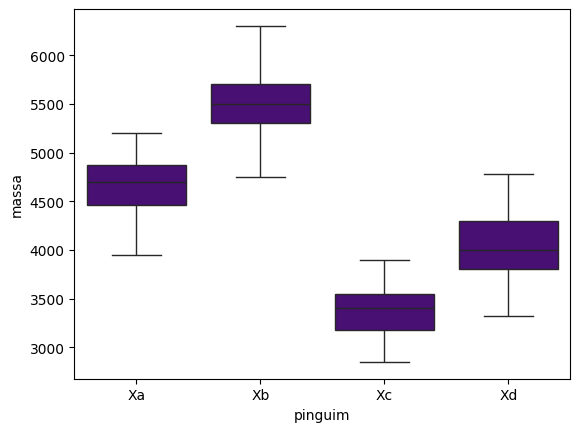

In [27]:
df = pd.DataFrame(
    {
        "medida": Xa+Xb+Xc+Xd,
        "local": ["Xa"] * len(Xa)
        + ["Xb"] * len(Xb)
        + ["Xc"] * len(Xc)
        + ["Xd"] * len(Xd),
    }
)

eixo = sns.boxplot(df, x="local", y="medida", color = "indigo")

eixo.set(xlabel="pinguim", ylabel="massa");

Aplicando o teste de Tukey pelo *dataframe* construído para o gráfico, temos os seguintes pvalores:

In [28]:
resultado_teste = sp.posthoc_tukey(df, val_col="medida", group_col="local")

resultado_teste

,Xa,Xb,Xc,Xd
Xa,1.000,0.001,0.001,0.001
Xb,0.001,1.000,0.001,0.001
Xc,0.001,0.001,1.000,0.001
Xd,0.001,0.001,0.001,1.000


Por fim, comparemos a relação entre as médias entre as variáveis aleatórias:

In [29]:
for i,j in combinations(resultado_teste.columns, 2):
    pvalor = resultado_teste.loc[i,j]
    
    if pvalor < significancia:
        logic = df["local"] == i
        media_i = df["medida"].loc[logic].mean()

        logic = df["local"] == j
        media_j = df["medida"].loc[logic].mean()

        if media_i < media_j:
            print(f"A média de {i} é menor do que a de {j}.")
        else:
            print(f"A média de {i} é maior do que a de {j}.")
    else:
        print(f"A média entre {i} e {j} é estatisticamente igual.")

A média de Xa é menor do que a de Xb.
A média de Xa é maior do que a de Xc.
A média de Xa é maior do que a de Xd.
A média de Xb é maior do que a de Xc.
A média de Xb é maior do que a de Xd.
A média de Xc é menor do que a de Xd.


#### Conclusão: 
Realizando o teste ANOVA para a massa de pinguins Gentoo e Adelie dos sexos feminino e masculino, concluímos que as médias entre a combinação dessas clasificações não são iguais, sendo pelo menos uma diferentes das demais. Assim, realizando o teste de Tukey para análise mais profunda desse resultado, pudemor ver que: a média da massa de Gentoos fêmea é menor que de Gentoos macho, mas maior que os pinguins Adelie; a média de massa de Gentoos macho é maior que todas as outras; e massa de Adelies machos é maior que de Adelies fêmeas, sendo os Adelies fêmeas os pinguins com menos massa de todos. Em geral, pudemos perceber que a espécie Gentoo é sempre mais pesada que a Adelie e, dentro de cada espécie, machos são mais pesados que fêmeas, como percepitível pelo gráfico plotado.

##### Referência:
SCIPY. *scipy.stats.bartlett*. Disponível em: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html. Acesso em: 14 Nov. 2024.

## Questão 4 (bônus)



Busque se informar sobre um teste de hipóteses que *não* tenha sido apresentado no material didático da disciplina. Use células de texto e escreva sobre como este teste funciona, quais são as hipóteses nula e alternativa e quais são as principais suposições (ou requerimentos) das variáveis aleatórias envolvidas no teste. Mostre este teste de hipóteses em ação aprendendo a utilizar ele com Python (provavelmente você irá utilizar o `scipy`). Por fim, se este teste fizer algo similar aos testes que já vimos, escreva brevemente sobre possíveis situações onde o teste que você escolheu seria preferível com relação ao teste já apresentado. Se este teste não fizer algo similar aos testes que já vimos, escreva brevemente sobre onde você acredita que ele seria utilizado em uma pesquisa científica.

<hr>



### Resposta:

In [30]:
from scipy import stats
import matplotlib.pyplot as plt

#### Teste de normalidade D'Agostino-Pearson

O teste de normalidade D'Agostino-Pearson é utilizado para identificar se uma variável aleatória $X$ segue uma distribuição normal. É baseado numa combinação dos testes qui-quadrado D'Agostino e de Pearson, analisando a assimetria e curtose (tamanho da cauda) da distribuição dos dados. Desse modo, ele testa as hipóteses:
-   $H_0$: a população de onde $X$ foi amostrado segue uma distribuição normal.
-   $H_1$: a população de onde $X$ foi amostrado *não* segue uma distribuição normal.

O teste em si não apresenta pré-requisitos, entretanto, para sua implementação pelo módulo `scipy`, é exigido uma amostragem com pelo menos 8 observações.

A função `normaltest` do `scipy` pode ser implementada como feito abaixo. Para isso, utilizamos a variável aleatória $X_a$ construída com relação à massa das amostras de pinguins Gentoo do sexo feminino, do *dataset* ditático "*penguins*" do módulo `seaborn`.

In [31]:
Xa = [4500.0, 4450.0, 4550.0, 4800.0, 4400.0, 4650.0, 4650.0, 4200.0, 4150.0, 4800.0, 5000.0, 4400.0, 5000.0, 4600.0, 4700.0, 5050.0, 5150.0, 4950.0, 4350.0, 3950.0, 4300.0, 4900.0, 4200.0, 5100.0, 4850.0, 4400.0, 4900.0, 4300.0, 4450.0, 4200.0, 4400.0, 4700.0, 4700.0, 4750.0, 5200.0, 4700.0, 4600.0, 4750.0, 4625.0, 4725.0, 4750.0, 4600.0, 4875.0, 4950.0, 4750.0, 4850.0, 4875.0, 4625.0, 4850.0, 4975.0, 4700.0, 4575.0, 5000.0, 4650.0, 4375.0, 4925.0, 4850.0, 5200.0]

In [32]:
resultado_teste = stats.normaltest(Xa)

pvalor = resultado_teste.pvalue

print("pvalor = ", pvalor)

if pvalor < significancia:
    print(f"Devemos rejeitar H0. Logo, Xa não segue distribuição normal.")
else:
    print(f"Não devemos rejeitar H0. Logo, Xa segue distribuição normal.")

pvalor =  0.507611872325671
Não devemos rejeitar H0. Logo, Xa segue distribuição normal.


Podemos fazer uma comparação com o teste de normalidade Shapiro-Wilk, também implementado do `scipy`. O teste de Shapiro-Wilk é o mais utilizado para identificar distribuições normais, e sua amotragem mínimo no módulo `scipy` é de apenas 3 observações.

In [33]:
resultado_teste = stats.shapiro(Xa)

pvalor = resultado_teste.pvalue

print("pvalor = ", pvalor)

if pvalor < significancia:
    print(f"Devemos rejeitar H0. Logo, Xa não segue distribuição normal.")
else:
    print(f"Não devemos rejeitar H0. Logo, Xa segue distribuição normal.")

pvalor =  0.5106648802757263
Não devemos rejeitar H0. Logo, Xa segue distribuição normal.


Percebe-se que o teste de Shapiro-Wilk apresenta uma sensibilidade um pouco maior para identificar a normalidade da amostra para a massa de pinguins gentoo fêmeas apresentada, entretanto, a diferença entre os pvalores calculados foi mínima e o teste apresentou mesmo resultado (falha em rejeitar $H_0$).

Podemos ainda, criar uma variável aleatória com poucas observações para comparar os resultados apresentados pelos dois testes de normalidade:

Text(0, 0.5, 'Ocorrências')

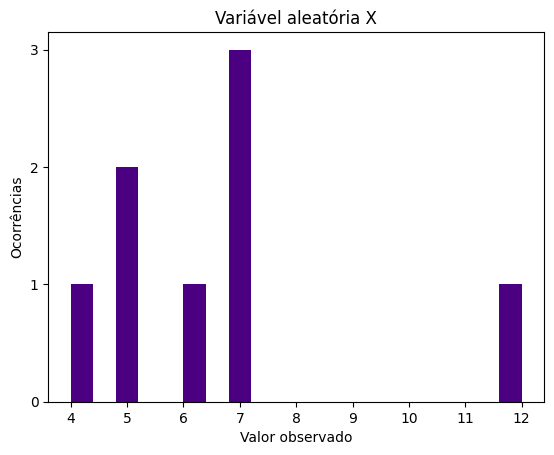

In [34]:
X = [4,5,5,6,7,7,7,12]

plt.hist(X, color= "indigo", bins=20)
plt.xticks([4,5,6,7,8,9,10,11,12])
plt.yticks([0,1,2,3])
plt.title("Variável aleatória X")
plt.xlabel("Valor observado")
plt.ylabel("Ocorrências")

In [35]:
resultado_teste = stats.normaltest(X)

pvalor = resultado_teste.pvalue

print("pvalor = ", pvalor)

if pvalor < significancia:
    print(f"Devemos rejeitar H0. Logo, X não segue distribuição normal.")
else:
    print(f"Não devemos rejeitar H0. Logo, X segue distribuição normal.")

pvalor =  0.011767724007599858
Devemos rejeitar H0. Logo, X não segue distribuição normal.


c:\venv\ilumpy\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [36]:
resultado_teste = stats.shapiro(X)

pvalor = resultado_teste.pvalue

print("pvalor = ", pvalor)

if pvalor < significancia:
    print(f"Devemos rejeitar H0. Logo, X não segue distribuição normal.")
else:
    print(f"Não devemos rejeitar H0. Logo, X segue distribuição normal.")

pvalor =  0.053416889160871506
Não devemos rejeitar H0. Logo, X segue distribuição normal.


Aqui, já apresentamos um desacordo entre os resultados apresentados: o teste D'Agostino-Pearson rejeitou $H_0$, enquanto o teste Shapiro-Wilk falhou em rejeitar, com pvalores de 0,012 e 0,53. Isso se dá pois a amotra apresenta uma grande assimetria e diferença entre as caudas da distribuição, fatores utilizados para o primeiro teste. Shapiro-Wilk utiliza de outros parâmetros para o teste, de modo que seja mais sensível a identificar uma distribuição normal, mesmo com alguns desvios na distribuição. 

#### Conclusão:
Apresentamos o funionamento do teste de normalidade D'Agostino-Pearson, em comparação com teste Shapiro-Wilk, aplicando-os à duas variáveis aleatórias. Assim, em geral, as principais diferenças apresentadas entre os dois testes de normalidade estão relacionados aos métodos utilizados para identificar a distribuição dos dados, de modo que o método de Shapiro-Wilk seja mais indicado, principalmete para variáveis aleatórias pequenas e com irregularidades na distribuição. O teste D'Agostino-Wilk também é bastante utilizado, mas não apresenta a mesma sensibilidade que o outro teste; entretanto, costuma ser mais efetivo se a variável aleatória for grande ou apresentar um caráter modal ou bimodal.

##### Referências:
SCIPY. *Statistical functions (scipy.stats)*. Disponível em: https://docs.scipy.org/doc/scipy/reference/stats.html. Acesso em: 15 Nov. 2024.

SCIPY. *scipy.stats.normaltest*. Disponível em: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#scipy.stats.normaltest. Acesso em: 15 Nov. 2024.

SCIPY. *scipy.stats.shapiro*. Disponível em: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro. Acesso em: 15 nov. 2024.

GUIMARÃES, Nara. Analisando a Distribuição Normal dos Dados: Testes e Análises. Medium, 2021. Disponível em: https://medium.com/@nara.guimaraes/analisando-a-distribui%C3%A7%C3%A3o-normal-dos-dados-testes-e-an%C3%A1lises-6d0d627501cd. Acesso em: 15 Nov. 2024.

## XKCD relevante



![img](https://imgs.xkcd.com/comics/final_exam.png)

`Imagem: Final Exam (XKCD) disponível em https://xkcd.com/2385`

Boa sorte!

